In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import graph_ruggedness_de
import gaussian_markov_random_field
import networkx as nx
import matplotlib as mpl
import graph_utils
import scipy.stats as stats
import seaborn as sns
from timestep_opt import fit_t_bayesian_laplace, compute_bayes_factor

## DMS folding dataset
Compute the Z-scores for DMS folding data (note: kernel dies, run from main using `main_hamming_z_score.py`)

In [101]:
file_list = os.listdir('../data_files/megascale_folding/')
file_list = [file for file in file_list if file != '.DS_Store']

file_list.sort()  # Ensure consistent order

likelihood_values = []
files = []
fielder_values = []
norm_factor = []

replicates = 1

landscape_t = {}
landscape_t_min = {}
landscape_t_max = {}


checkpoint_df = pd.DataFrame({
    'dataset': [],
    'z_score': [],
    't_map': [],
    't_min': [],
    't_max': [],
    'fiedler_value': []
})
parsed_files = []

for idx, file in enumerate(file_list):        
    try:
        if file.startswith('_'):
            continue
        elif file in parsed_files:
            continue
        # ax_col is an array of two axes: [hist_ax, bar_ax]

        df = pd.read_csv(f'../data_files/megascale_folding/{file}')
        df = df.dropna()
        
        # Continue if dataset too large
        if len(df) > 4000:
            continue
        
        seq_ls = df['mutated_sequence'].tolist()
        values = df['DMS_score'].tolist()

        # Build graph and compute metrics
        G_k = graph_ruggedness_de.build_ohe_graph(
            seq_ls=seq_ls,
            values=values,
            edges=False,
        )

        graph_ruggedness_de.add_hamming_edges(G_k, threshold=2)

        comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
        comb_L_dense = comb_laplacian.toarray()
        comb_eigenvalues, _ = np.linalg.eigh(comb_L_dense)
        comb_eigenvalues.sort()
        fielder_value = comb_eigenvalues[1]

        # if fielder_value < 1:
        #     continue
        
        fielder_values.append(fielder_value)

        t_map, ci_lower, ci_upper, logpost_map, _ = fit_t_bayesian_laplace(G=G_k,
                                                                           t_max=10,
                                                                           t_min=1e-8)


        parsed_files.append(file)
        landscape_t[file] = t_map
        landscape_t_max[file] = ci_upper
        landscape_t_min[file] = ci_lower
    
    except Exception as e:
        print(f'Error occurred: {str(e)}')


Added 828997 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 827541 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 785346 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 536947 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 981864 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1073119 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 673899 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1371575 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 577461 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 507528 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 960667 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1097383 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 923939 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 878288 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 764466 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 540280 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 882456 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 646701 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 426196 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 856863 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 890725 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 949634 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1009561 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 597369 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1147510 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 290191 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 201295 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 246033 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 609684 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 845650 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 848719 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 820671 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 304920 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 551937 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 520899 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 949509 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 350711 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 546108 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 698310 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 698461 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 713415 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 281518 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 524800 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 733866 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 801726 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 509545 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 766093 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 610167 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 969741 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 249571 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 541214 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 804760 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 268085 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 334687 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 703101 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1089881 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 675774 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 261003 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 1012231 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 547581 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 602046 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Added 581309 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3320603868.py:55: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3909948055.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datasets, rotation=90, fontsize=8)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/3909948055.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


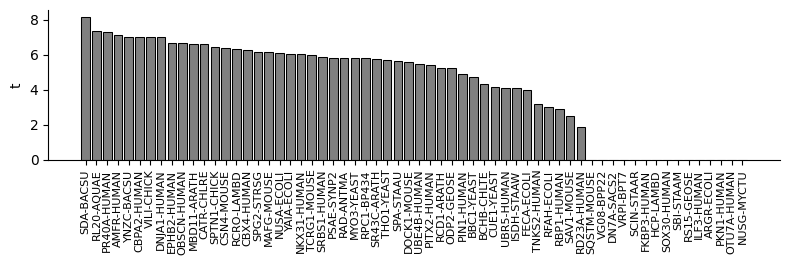

In [154]:
datasets = [dataset.strip('.csv') for dataset in parsed_files]
datasets = ['-'.join(dataset.split('_')[0:2]) for dataset in datasets] 
t_vals = [val for val in landscape_t.values()]
t_vals_min = [val for val in landscape_t_min.values()]
t_vals_max = [val for val in landscape_t_max.values()]

df = pd.DataFrame({
    "dataset": datasets,
    "t_vals": t_vals,
    "t_vals_upper": t_vals_max,
    "t_val_lower": t_vals_min
})

df = df.sort_values('t_vals', ascending=False)
datasets = df['dataset'].to_list()

fig, ax = plt.subplots(figsize=(8, 2.75), constrained_layout=True)
ax.bar(x=df['dataset'].to_list(), height=df['t_vals'].to_list(), color='grey', edgecolor='black', linewidth=0.75)
ax.set_xticklabels(datasets, rotation=90, fontsize=8)
ax.set_ylabel('t')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_a.pdf')
plt.show()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/1127607752.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datasets, rotation=90, fontsize=8)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_78665/1127607752.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


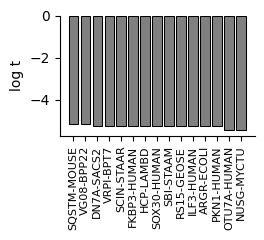

In [159]:
df = df[df['t_vals'] < 1]
vals = [np.log10(val) for val in df['t_vals'].to_list()]
datasets = [val for val in df['dataset'].tolist()]

fig, ax = plt.subplots(figsize=(2.75, 2.5), constrained_layout=True)
ax.bar(x=datasets, height=vals, color='grey', edgecolor='black', linewidth=0.75)
ax.set_xticklabels(datasets, rotation=90, fontsize=8)
ax.set_ylabel('log t')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_a_log_view.pdf')
plt.show()

## All-v-all Bayes factor comparison

In [4]:
graph_dict = {}
file_list = os.listdir('../data_files/megascale_folding/')
file_list = [file for file in file_list if file != '.DS_Store']

file_list.sort()  # Ensure consistent order



for idx, file in enumerate(file_list):        
    if file.startswith('_'):
        continue

    df = pd.read_csv(f'../data_files/megascale_folding/{file}')
    df = df.dropna()
    
    # Continue if dataset too large
    if len(df) > 4000:
        continue
    
    seq_ls = df['mutated_sequence'].tolist()
    values = df['DMS_score'].tolist()

    # Build graph and compute metrics
    G_k = graph_ruggedness_de.build_ohe_graph(
        seq_ls=seq_ls,
        values=values,
        edges=False,
    )

    graph_dict[file] = G_k

bfs_dict = {}

for file_a, G_k_a in graph_dict.items():
    for file_b, G_k_b in graph_dict.items():
        if file_a == file_b:
            bfs_dict[(file_a, file_b)] = np.nan
        else:
            graph_a = graph_dict[file_a]
            graph_b = graph_dict[file_b]

            BF, _, _ = compute_bayes_factor(G1=graph_a,
                                            G2=graph_b,
                                            t_min=1e-8, 
                                            t_max=10,
                                            verbose=True)
            
            bfs_dict[(file_a, file_b)] = BF

Optimization success: True, t_map=10.0000, f(t_map)=4284.4553
Optimization success: True, t_map=5.1657, f(t_map)=1947.1810
Joint optimization success: True, t_joint_map=10.0000, f(t_joint_map)=6231.6363
Log Evidence (H₀): -6216.901840836927
Log Evidence (H₁): -6209.341675638856
Bayes Factor (BF): 0.000520789203406789
Optimization success: True, t_map=10.0000, f(t_map)=4284.4553
Optimization success: True, t_map=10.0000, f(t_map)=3138.9273
Joint optimization success: True, t_joint_map=10.0000, f(t_joint_map)=7423.3826
Log Evidence (H₀): -7408.648112698157
Log Evidence (H₁): -7393.913663606988
Bayes Factor (BF): 3.9894228040135016e-07
Optimization success: True, t_map=10.0000, f(t_map)=4284.4553
Optimization success: True, t_map=10.0000, f(t_map)=2437.7067
Joint optimization success: True, t_joint_map=10.0000, f(t_joint_map)=6722.1619
Log Evidence (H₀): -6707.4274819635175
Log Evidence (H₁): -6692.693032872348
Bayes Factor (BF): 3.9894228040135016e-07
Optimization success: True, t_map=10

In [10]:
df


,AMFR_HUMAN_Tsuboyama_2023_4G3O.csv,ARGR_ECOLI_Tsuboyama_2023_1AOY.csv,BBC1_YEAST_Tsuboyama_2023_1TG0.csv,BCHB_CHLTE_Tsuboyama_2023_2KRU.csv,CATR_CHLRE_Tsuboyama_2023_2AMI.csv,CBPA2_HUMAN_Tsuboyama_2023_1O6X.csv,CBX4_HUMAN_Tsuboyama_2023_2K28.csv,CSN4_MOUSE_Tsuboyama_2023_1UFM.csv,CUE1_YEAST_Tsuboyama_2023_2MYX.csv,DN7A_SACS2_Tsuboyama_2023_1JIC.csv,...,TCRG1_MOUSE_Tsuboyama_2023_1E0L.csv,THO1_YEAST_Tsuboyama_2023_2WQG.csv,TNKS2_HUMAN_Tsuboyama_2023_5JRT.csv,UBE4B_HUMAN_Tsuboyama_2023_3L1X.csv,UBR5_HUMAN_Tsuboyama_2023_1I2T.csv,VG08_BPP22_Tsuboyama_2023_2GP8.csv,VILI_CHICK_Tsuboyama_2023_1YU5.csv,VRPI_BPT7_Tsuboyama_2023_2WNM.csv,YAIA_ECOLI_Tsuboyama_2023_2KVT.csv,YNZC_BACSU_Tsuboyama_2023_2JVD.csv
AMFR_HUMAN_Tsuboyama_2023_4G3O.csv,NaN,-3.283338,-6.399090,-6.399090,-6.399090,-3.404509,-3.001480,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-3.355312,-6.549605,-6.399090,-6.639079,-6.399090,-6.399090,-3.410107,-6.549605
ARGR_ECOLI_Tsuboyama_2023_1AOY.csv,-3.283338,NaN,-3.283338,-6.700120,-6.700120,-0.288758,0.114271,-3.283338,-3.283338,-6.549605,...,-6.563922,-6.549605,-3.427948,-3.283338,-6.549605,-0.368437,-3.283338,-6.586541,-0.294355,-3.433853
BBC1_YEAST_Tsuboyama_2023_1TG0.csv,-6.399090,-3.283338,NaN,-6.399090,-6.399090,-6.385260,-6.549605,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-3.355312,-6.399090,-6.399090,-6.541148,-6.399090,-6.399090,-6.549605,-3.529165
BCHB_CHLTE_Tsuboyama_2023_2KRU.csv,-6.399090,-6.700120,-6.399090,NaN,-6.399090,-3.404509,-3.001480,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-3.355312,-6.549605,-6.399090,-3.484189,-6.399090,-6.399090,-3.410107,-6.549605
CATR_CHLRE_Tsuboyama_2023_2AMI.csv,-6.399090,-6.700120,-6.399090,-6.399090,NaN,-3.404509,-3.001480,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-3.355312,-6.549605,-6.399090,-3.484189,-6.399090,-6.399090,-3.410107,-6.700120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VG08_BPP22_Tsuboyama_2023_2GP8.csv,-6.639079,-0.368437,-6.541148,-3.484189,-3.484189,-0.489609,-3.484190,-6.639079,-3.484189,-3.484189,...,-6.415134,-3.484189,-3.532760,-3.510523,-3.484189,NaN,-6.639079,-6.478456,-3.483951,-3.520645
VILI_CHICK_Tsuboyama_2023_1YU5.csv,-6.399090,-3.283338,-6.399090,-6.399090,-6.399090,-3.404509,-3.001480,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-3.355312,-6.549605,-6.399090,-6.639079,NaN,-6.399090,-3.410107,-6.549605
VRPI_BPT7_Tsuboyama_2023_2WNM.csv,-6.399090,-6.586541,-6.399090,-6.399090,-6.399090,-6.549605,-6.146741,-6.399090,-6.399090,-6.399090,...,-6.399090,-6.399090,-6.572457,-6.468293,-6.399090,-6.478456,-6.399090,NaN,-6.549605,-3.529165
YAIA_ECOLI_Tsuboyama_2023_2KVT.csv,-3.410107,-0.294355,-6.549605,-3.410107,-3.410107,-3.710700,-3.305021,-3.410107,-3.410107,-3.410107,...,-6.549453,-6.549605,-3.615559,-0.429356,-3.410107,-3.483951,-3.410107,-6.549605,NaN,-3.679388


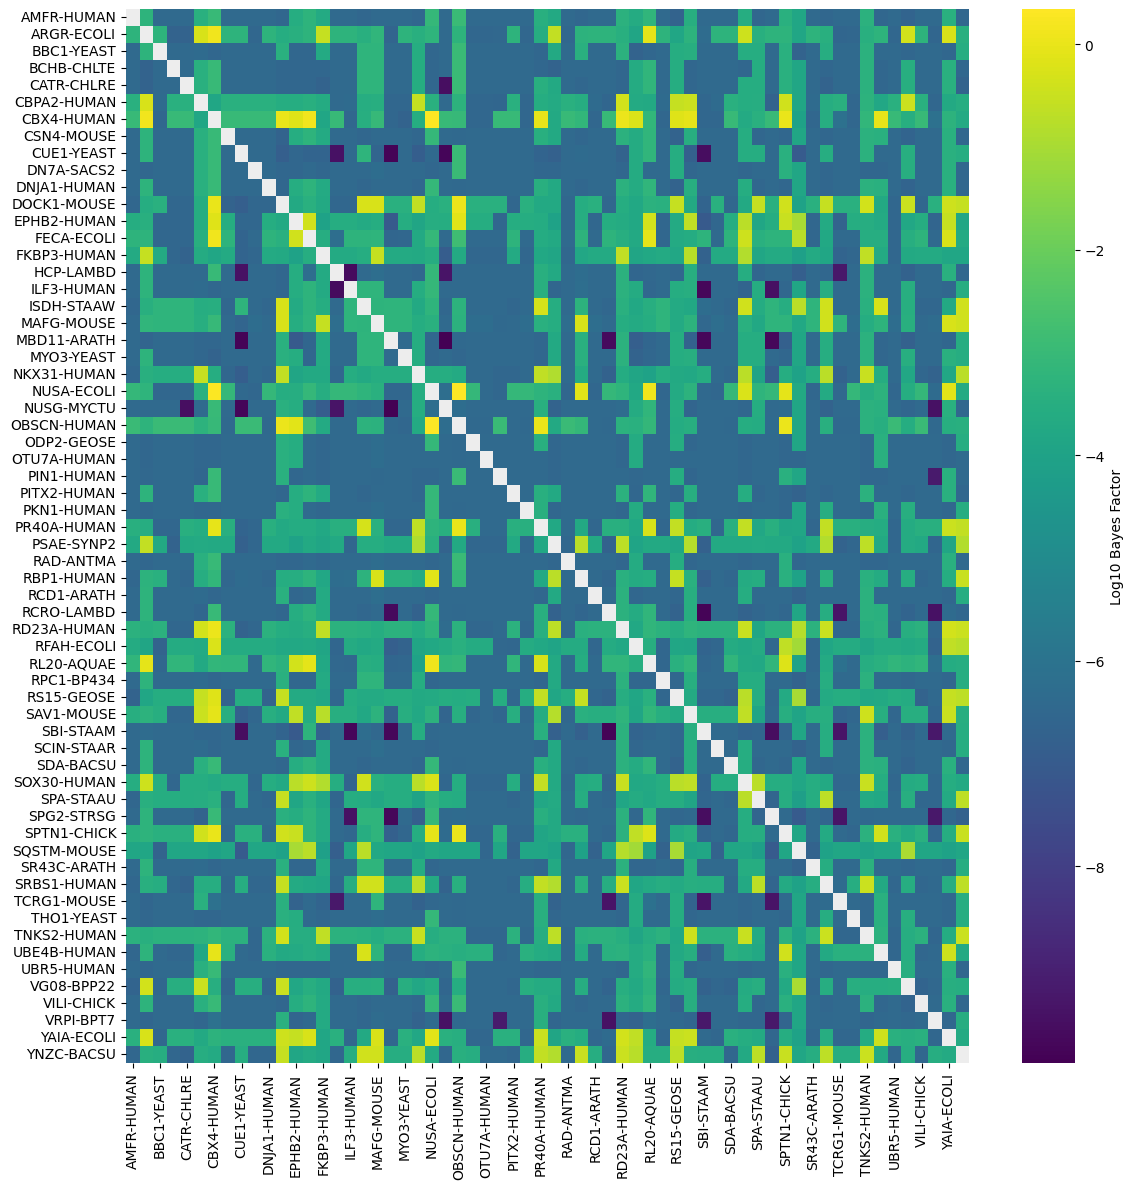

In [49]:
x_vals = sorted({'-'.join(k[0].split('_')[0:2]) for k in bfs_dict.keys()})
y_vals = sorted({'-'.join(k[1].split('_')[0:2]) for k in bfs_dict.keys()})

df = pd.DataFrame(index=x_vals, columns=y_vals)

df_bckup = df.copy()

for (x, y), bf in bfs_dict.items():
    x = '-'.join(x.split('_')[0:2])
    y = '-'.join(y.split('_')[0:2])
    df.loc[x, y] = np.log10(bf)

df = df.astype(float)

cmap = sns.color_palette("viridis", as_cmap=True)
cmap.set_bad(color='#EDEDED')

plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    df,
    annot=False,
    cmap=cmap,
)

cbar = ax.collections[0].colorbar
cbar.set_label("Log10 Bayes Factor")

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.savefig('../si_figures/si_figure_7/panel_a.pdf')
plt.show()

### Smooth example: SDA_BACSU_Tsuboyama_2023_1PV0.csv

Added 44975 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/3723973842.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/3723973842.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


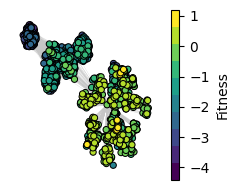

In [60]:
dat = pd.read_csv('../data_files/protein_gym/DMS_assays_substitutions/SDA_BACSU_Tsuboyama_2023_1PV0.csv')
wt_mut = dat.iloc[0,0]
wt_seq = dat.iloc[0,1]
wt_list =list(wt_seq)
wt_list[int(wt_mut[1:-1])-1] = wt_mut[0]
wt_seq = ''.join(wt_list)

seq_ls = dat['mutated_sequence'].to_list()
seq_ls.append(wt_seq)

values = dat['DMS_score'].to_list()
values.append(0)

G_k = graph_ruggedness_de.build_ohe_graph(
    seq_ls=seq_ls,
    values=values,
    edges=False,
)

graph_ruggedness_de.add_hamming_edges(G_k, threshold=1) 

values = [node[1]['value'] for node in G_k.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(G=G_k, k=0.0001)

nodes_sorted_by_value = sorted(G_k.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=20, width=0.15, edge_color='#C6C6C6', linewidths=0.75)

sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Fitness')

plt.tight_layout()
plt.savefig('../figures/figure_4/panel_b_graph.pdf')

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/1886450665.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='variance')


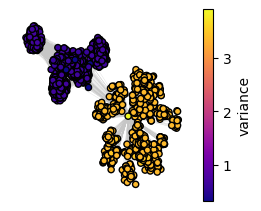

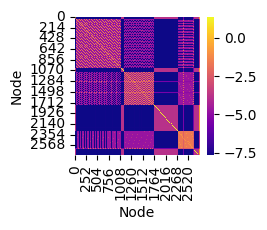

In [65]:
#Fit variance
sigma_squared = np.var(values, ddof=1)
#Timestep = 10

t_map, ci_lower, ci_upper, logpost_map, _ = fit_t_bayesian_laplace(G=G_k,
                                                                   t_max=10,
                                                                   t_min=1e-8)

#Generate sample under heat diffusion model and Gaussian Markov random field.

variances_H0, Sigma_H0 = gaussian_markov_random_field.compute_variances_H0(sigma_squared=sigma_squared,
                                                                           t=t_map,
                                                                           G=G_k)


fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)

norm0, cmap0 = graph_utils.visualize_signal_over_graph(G=G_k, pos=pos, signal=variances_H0, ax=ax, nodesize=20, edgewidth=0.15, cmap='plasma')
sm = plt.cm.ScalarMappable(cmap=cmap0, norm=norm0)
sm.set_array([]) 
fig.colorbar(sm, label='variance')
plt.savefig('../figures/figure_4/panel_b_covariance_graph.pdf')
plt.show()


vmin = (np.log(Sigma_H0)).min()
vmax = (np.log(Sigma_H0)).max()

fig = plt.subplots(figsize=(2.6, 2.4))
sns.heatmap(np.log(Sigma_H0), cmap='plasma')
plt.xlabel('Node')
plt.ylabel('Node')
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_b_covariance_matrix.pdf')
plt.show()

### Rugged example: OTU7A_HUMAN_Tsuboyama_2023_2L2D.csv

Added 5424 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/772232002.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/772232002.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


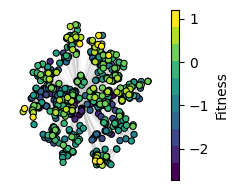

In [66]:
dat = pd.read_csv('../data_files/protein_gym/DMS_assays_substitutions/OTU7A_HUMAN_Tsuboyama_2023_2L2D.csv')
wt_mut = dat.iloc[0,0]
wt_seq = dat.iloc[0,1]
wt_list =list(wt_seq)
wt_list[int(wt_mut[1:-1])-1] = wt_mut[0]
wt_seq = ''.join(wt_list)

seq_ls = dat['mutated_sequence'].to_list()
seq_ls.append(wt_seq)

values = dat['DMS_score'].to_list()
values.append(0)

G_k = graph_ruggedness_de.build_ohe_graph(
    seq_ls=seq_ls,
    values=values,
    edges=False,
)

graph_ruggedness_de.add_hamming_edges(G_k, threshold=1) 

values = [node[1]['value'] for node in G_k.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(G=G_k, k=0.0001)

nodes_sorted_by_value = sorted(G_k.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=20, width=0.15, edge_color='#C6C6C6', linewidths=0.75)

sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Fitness')
plt.savefig('../figures/figure_4/panel_c_graph.pdf')
plt.tight_layout()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/4056177811.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='variance')


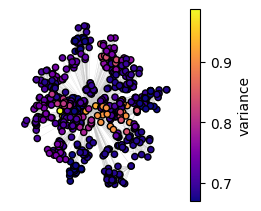

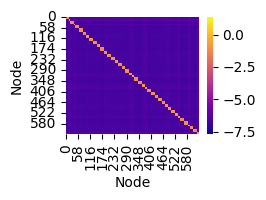

In [67]:
#Fit variance
sigma_squared = np.var(values, ddof=1)
#Timestep = 10

t_map, ci_lower, ci_upper, logpost_map, _ = fit_t_bayesian_laplace(G=G_k,
                                                                   t_max=10,
                                                                   t_min=1e-8)

#Generate sample under heat diffusion model and Gaussian Markov random field.

variances_H0, Sigma_H0 = gaussian_markov_random_field.compute_variances_H0(sigma_squared=sigma_squared,
                                                                           t=t_map,
                                                                           G=G_k)


fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)

norm0, cmap0 = graph_utils.visualize_signal_over_graph(G=G_k, pos=pos, signal=variances_H0, ax=ax, nodesize=20, edgewidth=0.15, cmap='plasma')
sm = plt.cm.ScalarMappable(cmap=cmap0, norm=norm0)
sm.set_array([]) 
fig.colorbar(sm, label='variance')
plt.savefig('../figures/figure_4/panel_c_covariance_graph.pdf')
plt.show()

fig = plt.subplots(figsize=(2.6, 2.1))
sns.heatmap(np.log(Sigma_H0), cmap='plasma', vmin=vmin, vmax=vmax)
plt.xlabel('Node')
plt.ylabel('Node')
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_c_covariance_matrix.pdf')
plt.show()


## Sparse landscape

In [69]:
file_list = os.listdir('../data_files/sparse_datasets/')
file_list = [file for file in file_list if file != '.DS_Store' and file != 'LacI_DBD.csv']

file_list.sort()  # Ensure consistent order

likelihood_values = []
files = []
fielder_values = []
norm_factor = []

replicates = 1

landscape_likelihoods = {}

for idx, file in enumerate(file_list):
    if file.startswith('_'):
        continue
    # ax_col is an array of two axes: [hist_ax, bar_ax]

    df = pd.read_csv(f'../data_files/sparse_datasets/{file}')
    df = df.dropna()
    seq_ls = df['sequence'].tolist()
    values = df['fitness'].tolist()

    # Build graph and compute metrics
    G_k = graph_ruggedness_de.build_ohe_graph(
        seq_ls=seq_ls,
        values=values,
        edges=True,
        hamming_edges=False,
        approximate=True,
        n=int(np.sqrt(len(df)))
    )


    comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
    comb_L_dense = comb_laplacian.toarray()
    comb_eigenvalues, _ = np.linalg.eigh(comb_L_dense)
    comb_eigenvalues.sort()
    fielder_value = comb_eigenvalues[1]

    # if fielder_value < 1:
    #     continue
    
    fielder_values.append(fielder_value)


    likelihood_replicates = []
    for replicate in range(replicates):

        G_sampled = graph_ruggedness_de.sample_graph(G=G_k, sample_size=1)[0]
        graph_ruggedness_de.add_ohe_knn_edges(G_sampled, k=int(np.sqrt(G_sampled.number_of_nodes())))

        t_map, ci_lower, ci_upper, logpost_map, var_approx = fit_t_bayesian_laplace(G=G_sampled,
                                                                                    t_min=1e-8,
                                                                                    t_max=10)
        
        likelihood_replicates.append(t_map)

    landscape_likelihoods[file] = np.array(likelihood_replicates)


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1130it [00:00, 9757.53it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1130it [00:00, 33548.26it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Computing all vs. all OHE distance matrix.
Done.
Finding K-nearest neighbors.
Done.
Added 21359 KNN edges.
Building approx. NN index.
Done.


Adding OHE vectors to index.: 195it [00:00, 1396.53it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 195it [00:00, 22512.16it/s]

Computing all vs. all OHE distance matrix.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()



Done.
Finding K-nearest neighbors.
Done.
Added 772 KNN edges.
Building approx. NN index.
Done.


Adding OHE vectors to index.: 651it [00:00, 2479.67it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 651it [00:00, 37669.23it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Computing all vs. all OHE distance matrix.
Done.
Finding K-nearest neighbors.
Done.
Added 9898 KNN edges.
Building approx. NN index.
Done.


Adding OHE vectors to index.: 224it [00:00, 1475.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 224it [00:00, 41699.17it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Computing all vs. all OHE distance matrix.
Done.
Finding K-nearest neighbors.
Done.
Added 217 KNN edges.
Building approx. NN index.
Done.


Adding OHE vectors to index.: 90it [00:00, 936.10it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 90it [00:00, 22026.34it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Computing all vs. all OHE distance matrix.
Done.
Finding K-nearest neighbors.
Done.
Added 73 KNN edges.
Building approx. NN index.
Done.


Adding OHE vectors to index.: 214it [00:00, 903.02it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 214it [00:00, 39997.37it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/543243705.py:36: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()


Connecting components
Computing all vs. all OHE distance matrix.
Done.
Finding K-nearest neighbors.
Done.
Added 180 KNN edges.


In [109]:
landscape_likelihoods

{'AP_catef_1.csv': 2.5525705678847115,
 'DHFR_ic50_c57.csv': 1.0988545132629413,
 'DHFR_ic50_c58.csv': 0.8280133343162324,
 'DHFR_ic50_c59.csv': 0.44350758867815127,
 'DHFR_ic50_c60.csv': 0.15753431590901656,
 'DHFR_ic50_c61.csv': 0.7132443259072776,
 'DHFR_ic75_palmer.csv': 1.234762089474731,
 'DHFR_kcat_trajg.csv': 2.3904668978659833,
 'DHFR_kcat_trajr.csv': 1.7420477052713281,
 'DHFR_ki_trajg.csv': 3.594074869525069,
 'DHFR_ki_trajr.csv': 3.5838515726480167,
 'MPH_catact_CaPTM.csv': 3.4689749918930906,
 'MPH_catact_CdPTM.csv': 2.6555046652894,
 'MPH_catact_CoPTM.csv': 2.9814205659065602,
 'MPH_catact_CuPTM.csv': 2.807149674156309,
 'MPH_catact_MgPTM.csv': 3.962536982170136,
 'MPH_catact_MnPTM.csv': 3.838444910949299,
 'MPH_catact_NiPTM.csv': 3.0837646363723055,
 'MPH_catact_ZnPTM.csv': 2.935557486082913,
 'NfsA_ec50_2039.csv': 4.617142288816824,
 'NfsA_ec50_3637.csv': 4.101826756897655,
 'OXA-48_ic50_CAZtraj1.csv': 2.512686206649652,
 'OXA-48_ic50_CAZtraj2.csv': 4.3496158867546155,


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/1442857894.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['CM', 'PETase', 'PPAT', 'CuSOD', 'Lysozyme', 'MPH'], rotation=90, fontsize=8)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/1442857894.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


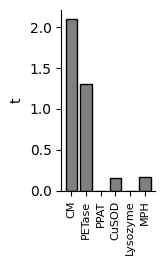

In [77]:
stds = []
means = []
for key in landscape_likelihoods.keys():
    means.append(np.mean(landscape_likelihoods[key]))
    stds.append(np.std(landscape_likelihoods[key]))

fig, ax = plt.subplots(figsize=(1.75, 2.75), constrained_layout=True)
plt.bar(x=['CM', 'PETase', 'PPAT', 'CuSOD', 'Lysozyme', 'MPH'], height=means, color='grey', edgecolor='black')
ax.set_xticklabels(['CM', 'PETase', 'PPAT', 'CuSOD', 'Lysozyme', 'MPH'], rotation=90, fontsize=8)
ax.set_ylabel('t')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_d.pdf')
plt.show()

## Combinatorially complete

In [78]:

file_list = os.listdir('../data_files/combinatorial_complete/')
file_list = [file for file in file_list if file != '.DS_Store']

file_list.sort()  # Ensure consistent order

likelihood_values = []
files = []
fielder_values = []
norm_factor = []

replicates = 1

landscape_likelihoods = {}


for idx, file in enumerate(file_list):        
    if file.startswith('_'):
        continue

    # ax_col is an array of two axes: [hist_ax, bar_ax]

    dtype_spec = {'Genotype': str}
    df = pd.read_csv(f'../data_files/combinatorial_complete/{file}', dtype=dtype_spec)
    df = df.dropna()
            
    seq_ls = df['Genotype'].tolist()
    values = df['F'].tolist()

    # Build graph and compute metrics
    G_k = graph_ruggedness_de.build_ohe_graph(
        seq_ls=seq_ls,
        values=values,
        edges=False,
    )

    #Add single mutation edges
    graph_ruggedness_de.add_hamming_edges(G_k, threshold=1)

    comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
    comb_L_dense = comb_laplacian.toarray()
    comb_eigenvalues, _ = np.linalg.eigh(comb_L_dense)
    comb_eigenvalues.sort()
    fielder_value = comb_eigenvalues[1]
    
    fielder_values.append(fielder_value)


    t_map, ci_lower, ci_upper, logpost_map, var_approx = fit_t_bayesian_laplace(G=G_k,
                                                                                t_min=1e-8,
                                                                                t_max=10)
    landscape_likelihoods[file] = t_map

Added 75 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 186 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 75 Hamming edges.
Added 441 Hamming edges.
Added 441 Hamming edges.
Added 28 Hamming edges.
Added 186 Hamming edges.
Added 186 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It wil

Added 28 Hamming edges.
Added 186 Hamming edges.
Added 186 Hamming edges.
Added 186 Hamming edges.
Added 186 Hamming edges.
Added 75 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.
Added 28 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.13.0.
  comb_laplacian = nx.laplacian_matrix(G_k).asfptype()
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2958171594.py:39: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It wil

In [79]:
landscape_likelihoods

{'AP_catef_1.csv': 2.5525705678847115,
 'DHFR_ic50_c57.csv': 1.0988545132629413,
 'DHFR_ic50_c58.csv': 0.8280133343162324,
 'DHFR_ic50_c59.csv': 0.44350758867815127,
 'DHFR_ic50_c60.csv': 0.15753431590901656,
 'DHFR_ic50_c61.csv': 0.7132443259072776,
 'DHFR_ic75_palmer.csv': 1.234762089474731,
 'DHFR_kcat_trajg.csv': 2.3904668978659833,
 'DHFR_kcat_trajr.csv': 1.7420477052713281,
 'DHFR_ki_trajg.csv': 3.594074869525069,
 'DHFR_ki_trajr.csv': 3.5838515726480167,
 'MPH_catact_CaPTM.csv': 3.4689749918930906,
 'MPH_catact_CdPTM.csv': 2.6555046652894,
 'MPH_catact_CoPTM.csv': 2.9814205659065602,
 'MPH_catact_CuPTM.csv': 2.807149674156309,
 'MPH_catact_MgPTM.csv': 3.962536982170136,
 'MPH_catact_MnPTM.csv': 3.838444910949299,
 'MPH_catact_NiPTM.csv': 3.0837646363723055,
 'MPH_catact_ZnPTM.csv': 2.935557486082913,
 'NfsA_ec50_2039.csv': 4.617142288816824,
 'NfsA_ec50_3637.csv': 4.101826756897655,
 'OXA-48_ic50_CAZtraj1.csv': 2.512686206649652,
 'OXA-48_ic50_CAZtraj2.csv': 4.3496158867546155,


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2376763178.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datasets, rotation=90, fontsize=8)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/2376763178.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


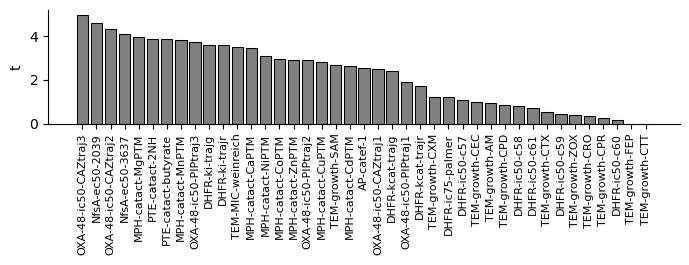

In [86]:

checkpoint_df = pd.DataFrame({
    'dataset': landscape_likelihoods.keys(),
    't': landscape_likelihoods.values()
})

checkpoint_df = checkpoint_df.sort_values(by='t', ascending=False)

datasets = checkpoint_df['dataset'].to_list()
datasets = [dataset.strip('.csv').replace('_', '-') for dataset in datasets]

fig, ax = plt.subplots(figsize=(7, 2.75), constrained_layout=True)
ax.bar(x=datasets, height=checkpoint_df['t'], color='grey', edgecolor='black', linewidth=0.75)
ax.set_xticklabels(datasets, rotation=90, fontsize=8)
ax.set_ylabel('t')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_e.pdf')
plt.show()

### Rugged example: TEM-growth-FEP

Added 28 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/4253543718.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/4253543718.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


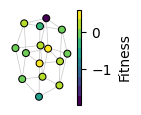

In [105]:
dtype_spec = {'Genotype': str}
    
df = pd.read_csv('../data_files/combinatorial_complete/TEM_growth_FEP.csv', dtype=dtype_spec)
df = df.dropna()
seq_ls = df['Genotype'].tolist()
values = df['F'].tolist()

# Build graph and compute metrics
G_k = graph_ruggedness_de.build_ohe_graph(
    seq_ls=seq_ls,
    values=values,
    edges=False,
)

#Add single mutation edges
graph_ruggedness_de.add_hamming_edges(G_k, threshold=1)

values = [node[1]['value'] for node in G_k.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(G=G_k)

nodes_sorted_by_value = sorted(G_k.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(1.5, 1.25), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)

sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Fitness')

plt.tight_layout()
# plt.savefig('../figures/figure_4/panel_f.pdf')

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/1810398367.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='variance')


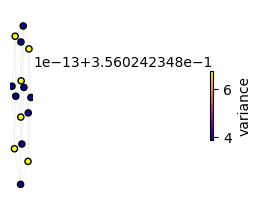

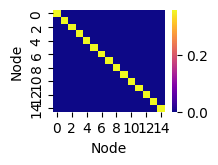

In [108]:
#Fit variance
sigma_squared = np.var(values, ddof=1)
#Timestep = 10

t_map, ci_lower, ci_upper, logpost_map, _ = fit_t_bayesian_laplace(G=G_k,
                                                                   t_max=10,
                                                                   t_min=1e-8)

#Generate sample under heat diffusion model and Gaussian Markov random field.

variances_H0, Sigma_H0 = gaussian_markov_random_field.compute_variances_H0(sigma_squared=sigma_squared,
                                                                           t=t_map,
                                                                           G=G_k)


fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)


norm0, cmap0 = graph_utils.visualize_signal_over_graph(G=G_k, pos=pos, signal=variances_H0, ax=ax, nodesize=20, edgewidth=0.15, cmap='plasma')
sm = plt.cm.ScalarMappable(cmap=cmap0, norm=norm0)
sm.set_array([]) 
fig.colorbar(sm, label='variance')
plt.savefig('../figures/figure_4/panel_f_covariance_graph.pdf')
plt.show()

fig = plt.subplots(figsize=(2.25, 1.75))
sns.heatmap(Sigma_H0, cmap='plasma')#, vmin=vmin, vmax=vmax)
plt.xlabel('Node')
plt.ylabel('Node')
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_f_covariance_matrix.pdf')
plt.show()

### Smooth example: TEM-growth-SAM

Added 75 Hamming edges.


/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/4196681720.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/4196681720.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


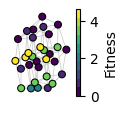

In [104]:
dtype_spec = {'Genotype': str}
    
df = pd.read_csv('../data_files/combinatorial_complete/TEM_MIC_weinreich.csv', dtype=dtype_spec)
df = df.dropna()
seq_ls = df['Genotype'].tolist()
values = df['F'].tolist()

# Build graph and compute metrics
G_k = graph_ruggedness_de.build_ohe_graph(
    seq_ls=seq_ls,
    values=values,
    edges=False,
)

#Add single mutation edges
graph_ruggedness_de.add_hamming_edges(G_k, threshold=1)

values = [node[1]['value'] for node in G_k.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(G=G_k)

nodes_sorted_by_value = sorted(G_k.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(1.5, 1.25), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)

sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Fitness')

plt.tight_layout()
plt.savefig('../figures/figure_4/panel_g.pdf')

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_73603/3886211536.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='variance')


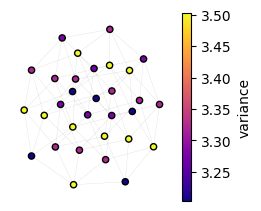

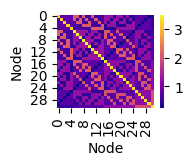

In [98]:
#Fit variance
sigma_squared = np.var(values, ddof=1)
#Timestep = 10

t_map, ci_lower, ci_upper, logpost_map, _ = fit_t_bayesian_laplace(G=G_k,
                                                                   t_max=10,
                                                                   t_min=1e-8)

#Generate sample under heat diffusion model and Gaussian Markov random field.

variances_H0, Sigma_H0 = gaussian_markov_random_field.compute_variances_H0(sigma_squared=sigma_squared,
                                                                           t=t_map,
                                                                           G=G_k)


fig, ax = plt.subplots(figsize=(2.5, 2), constrained_layout=True)

vmin = Sigma_H0.min()
vmax = Sigma_H0.max()

norm0, cmap0 = graph_utils.visualize_signal_over_graph(G=G_k, pos=pos, signal=variances_H0, ax=ax, nodesize=20, edgewidth=0.15, cmap='plasma')
sm = plt.cm.ScalarMappable(cmap=cmap0, norm=norm0)
sm.set_array([]) 
fig.colorbar(sm, label='variance')
plt.savefig('../figures/figure_4/panel_g_covariance_graph.pdf')
plt.show()

fig = plt.subplots(figsize=(2, 1.75))
sns.heatmap(Sigma_H0, cmap='plasma', vmin=vmin, vmax=vmax)
plt.xlabel('Node')
plt.ylabel('Node')
plt.tight_layout()
plt.savefig('../figures/figure_4/panel_g_covariance_matrix.pdf')
plt.show()

## All-vs-all BF for combinatorially complete datsets.

In [114]:
graph_dict = {}
file_list = os.listdir('../data_files/combinatorial_complete/')
file_list = [file for file in file_list if file != '.DS_Store']

file_list.sort()  # Ensure consistent order



for idx, file in enumerate(file_list):        
    if file.startswith('_'):
        continue

    # ax_col is an array of two axes: [hist_ax, bar_ax]

    dtype_spec = {'Genotype': str}
    df = pd.read_csv(f'../data_files/combinatorial_complete/{file}', dtype=dtype_spec)
    df = df.dropna()
            
    seq_ls = df['Genotype'].tolist()
    values = df['F'].tolist()

    # Build graph and compute metrics
    G_k = graph_ruggedness_de.build_ohe_graph(
        seq_ls=seq_ls,
        values=values,
        edges=False,
    )

    graph_dict[file] = G_k

bfs_dict = {}

for file_a, G_k_a in graph_dict.items():
    for file_b, G_k_b in graph_dict.items():
        if file_a == file_b:
            bfs_dict[(file_a, file_b)] = np.nan
        else:
            graph_a = graph_dict[file_a]
            graph_b = graph_dict[file_b]

            BF, _, _ = compute_bayes_factor(G1=graph_a,
                                            G2=graph_b,
                                            t_min=1e-8, 
                                            t_max=10,
                                            verbose=True)
            
            bfs_dict[(file_a, file_b)] = BF

Optimization success: True, t_map=10.0000, f(t_map)=70.5061
Optimization success: True, t_map=10.0000, f(t_map)=16.0337
Joint optimization success: True, t_joint_map=10.0000, f(t_joint_map)=86.5398
Log Evidence (H₀): -71.80535121038099
Log Evidence (H₁): -57.07090211921205
Bayes Factor (BF): 3.989422804014352e-07
Optimization success: True, t_map=10.0000, f(t_map)=70.5061
Optimization success: True, t_map=10.0000, f(t_map)=19.4209
Joint optimization success: True, t_joint_map=10.0000, f(t_joint_map)=89.9270
Log Evidence (H₀): -75.1925820371624
Log Evidence (H₁): -60.45813294599346
Bayes Factor (BF): 3.9894228040143804e-07
Optimization success: True, t_map=10.0000, f(t_map)=70.5061
Optimization success: True, t_map=5.4720, f(t_map)=42.4772
Joint optimization success: True, t_joint_map=5.8649, f(t_joint_map)=112.9833
Log Evidence (H₀): -103.56335449562172
Log Evidence (H₁): -89.24482148506469
Bayes Factor (BF): 6.047002171539836e-07
Optimization success: True, t_map=10.0000, f(t_map)=70.

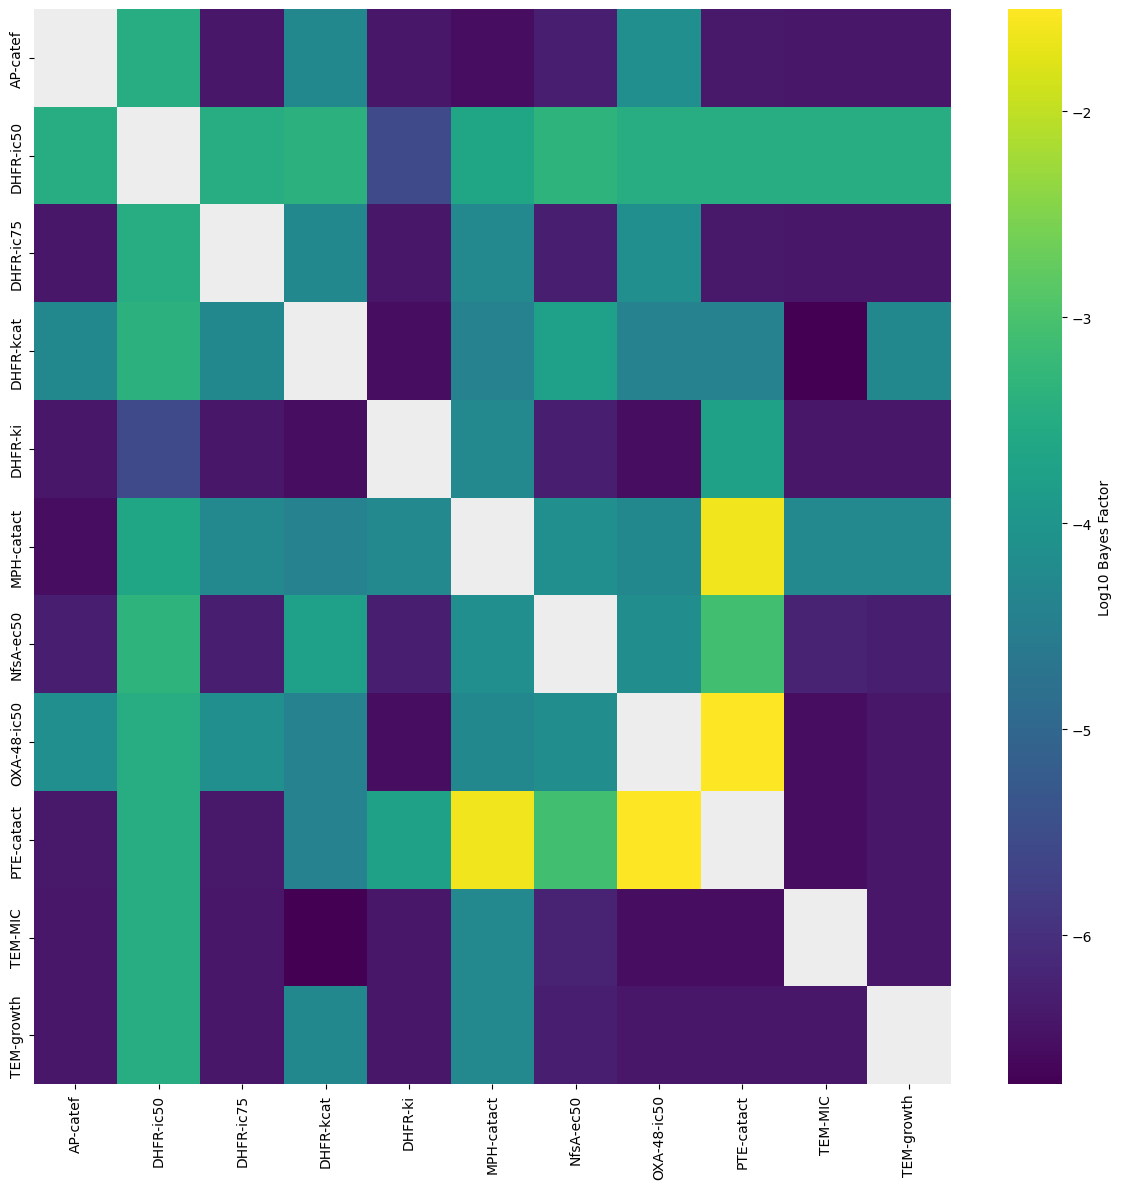

In [115]:
x_vals = sorted({'-'.join(k[0].split('_')[0:2]) for k in bfs_dict.keys()})
y_vals = sorted({'-'.join(k[1].split('_')[0:2]) for k in bfs_dict.keys()})

df = pd.DataFrame(index=x_vals, columns=y_vals)

df_bckup = df.copy()

for (x, y), bf in bfs_dict.items():
    x = '-'.join(x.split('_')[0:2])
    y = '-'.join(y.split('_')[0:2])
    df.loc[x, y] = np.log10(bf)

df = df.astype(float)

cmap = sns.color_palette("viridis", as_cmap=True)
cmap.set_bad(color='#EDEDED')

plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    df,
    annot=False,
    cmap=cmap,
)

cbar = ax.collections[0].colorbar
cbar.set_label("Log10 Bayes Factor")

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.savefig('../si_figures/si_figure_9/panel_a.pdf')
plt.show()